## Hypermarket Sales Prediction

In [1]:
#import libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:/Users/HP/Desktop/Train.csv')
test = pd.read_csv('C:/Users/HP/Desktop/Test.csv')
train.shape

(8523, 12)

In [3]:
test.shape

(5681, 11)

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

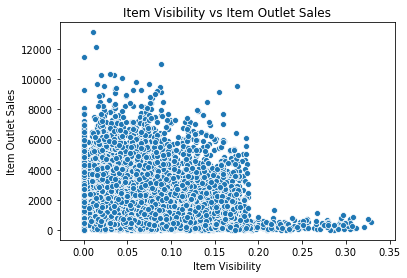

In [6]:
#check range of item visibility
sns.scatterplot(x = train.Item_Visibility, y = train.Item_Outlet_Sales, data = train)
plt.title("Item Visibility vs Item Outlet Sales")
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.show()

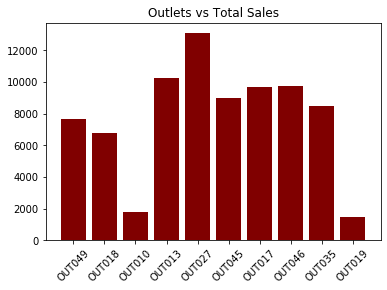

In [7]:
#check outlets with highest sales
plt.bar(train['Outlet_Identifier'], train['Item_Outlet_Sales'], color ='maroon', width=0.8)
plt.title("Outlets vs Total Sales")
plt.xticks(rotation=45)
plt.show()

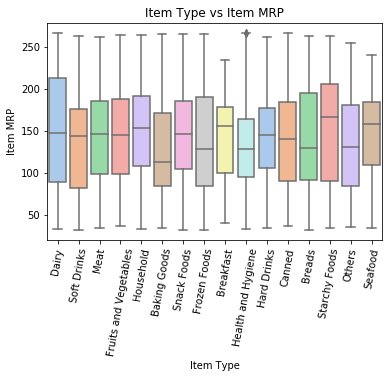

In [8]:
#Check for outliers
plt.figure()
sns.boxplot(x="Item_Type", y="Item_MRP", data=train, palette='pastel')
plt.xticks(rotation=80) #rotate x-axis labels by 80 degrees
plt.xlabel("Item Type")
plt.ylabel("Item MRP")
plt.title('Item Type vs Item MRP')
plt.show()

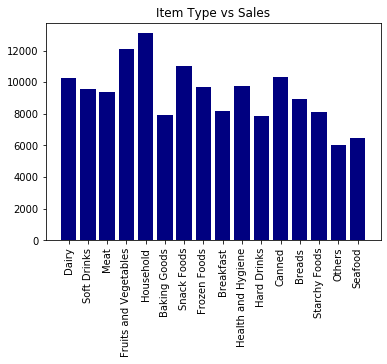

In [9]:
#Item(s) with highest sales
fig = plt.bar(train['Item_Type'], train['Item_Outlet_Sales'], color ='navy')
plt.title("Item Type vs Sales")
plt.xticks(rotation=90)
plt.show()

In [10]:
test['Item_Outlet_Sales']=1
test.shape

(5681, 12)

In [11]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
#relationship between 'Outlet_Size' and 'Outlet_Location_Type'

size_cross_loc = pd.crosstab(train.Outlet_Size,train.Outlet_Location_Type)
size_cross_loc

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [15]:
#Since all the small outlets are in Tier 2 location, map the atttributes
match = {"Tier 2":"Small"}
m = train['Outlet_Location_Type'].map(match)
train['Outlet_Size'] = train['Outlet_Size'].combine_first(m)

match = {"Tier 2":"Small"}
m = test['Outlet_Location_Type'].map(match)
test['Outlet_Size'] = test['Outlet_Size'].combine_first(m)

In [16]:
train.isnull().sum(axis=0)
test.isnull().sum(axis=0)

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  370
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [17]:
#since some null values are still present in 'Outlet_Size', check it's relationship with 'Outlet_Type' to map

size_cross_type = pd.crosstab(train['Outlet_Size'],train['Outlet_Type'])
size_cross_type

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,3715,0,0


In [18]:
#Mapping the attributes in both test and train dataset

match = {'Grocery Store':'Small'}
m = train.Outlet_Type.map(match)
train['Outlet_Size']= train['Outlet_Size'].combine_first(m)

match = {'Grocery Store':'Small'}
m = test.Outlet_Type.map(match)
test['Outlet_Size']= test['Outlet_Size'].combine_first(m)

In [19]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
#Impute missing values in 'Item_Weight'
train['Item_Weight'].fillna(int(train['Item_Weight'].mean()), inplace=True)

#check for null-values in 'Item_Weight'
train.isnull().sum(axis=0)

test['Item_Weight'].fillna(int(test['Item_Weight'].mean()), inplace=True)

In [21]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('LF','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('low fat','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')
train['Item_Fat_Content'].value_counts()

test['Item_Fat_Content']=test['Item_Fat_Content'].replace('LF','Low Fat')
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('low fat','Low Fat')
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('reg','Regular')
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [24]:
#Impute missing values in 'Item_Visibility'
train['Item_Visibility']=train['Item_Visibility'].replace(0.000000,train['Item_Visibility'].mean())
train['Item_Visibility'].value_counts() 

test['Item_Visibility']=test['Item_Visibility'].replace(0.000000,train['Item_Visibility'].mean())
test['Item_Visibility'].value_counts()

0.070213    353
0.077169      2
0.081772      2
0.046635      2
0.072816      2
           ... 
0.101626      1
0.091380      1
0.060802      1
0.011728      1
0.020601      1
Name: Item_Visibility, Length: 5277, dtype: int64

In [25]:
#check for null-values in 'Item_Weight'
train.isnull().sum(axis=0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
train['Year']=2013-train['Outlet_Establishment_Year']
test['Year']=2013-test['Outlet_Establishment_Year']

In [31]:
train['Item_Type_New'] = train['Item_Identifier']
test['Item_Type_New'] = test['Item_Identifier']

In [32]:
#Rename values
train['Item_Type_New'].replace(to_replace="^FD*.*",value="Food",regex=True,inplace=True)
train['Item_Type_New'].replace(to_replace="^DR*.*",value="Drinks",regex=True,inplace=True)
train['Item_Type_New'].replace(to_replace="^NC*.*",value="Non-Consumable",regex=True,inplace=True)

test['Item_Type_New'].replace(to_replace="^FD*.*",value="Food",regex=True,inplace=True)
test['Item_Type_New'].replace(to_replace="^DR*.*",value="Drinks",regex=True,inplace=True)
test['Item_Type_New'].replace(to_replace="^NC*.*",value="Non-Consumable",regex=True,inplace=True)

test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Year,Item_Type_New
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1,14,Food
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,1,6,Food
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,1,15,Non-Consumable
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,1,6,Food
4,FDY38,12.000,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1,28,Food


In [35]:
train['Item_Type_New'].value_counts() #to check if encoding is done for all values

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_New, dtype: int64

In [36]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Year                           int64
Outlet                        object
Item_Type_New                 object
dtype: object

In [37]:
categorical = train.select_dtypes(include=[object])
categorical.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet',
       'Item_Type_New'],
      dtype='object')

In [39]:
train['Outlet'] = train.Outlet_Identifier
test['Outlet'] = test.Outlet_Identifier

In [41]:
cat_col = categorical.loc[:,['Item_Fat_Content', 'Item_Type', 'Outlet','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_New']]
cat_col.head()

,Item_Fat_Content,Item_Type,Outlet,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_New
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,Food
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Consumable


In [47]:
#Label encoding the values
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in cat_col:
    train[i] = LE.fit_transform(train[i])

for i in cat_col:
    test[i] = LE.fit_transform(test[i])

#### PREDICTIVE MODELLING
###### 1) Linear model

In [48]:
predictors=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet','Outlet_Size','Outlet_Location_Type','Outlet_Type','Year',
            'Item_Type_New']

In [51]:
X = train[predictors]
y = train['Item_Outlet_Sales']

A = test[predictors]
b = test['Item_Outlet_Sales']

In [52]:
from sklearn.model_selection import train_test_split

# split the data with Train:Test = 6:4 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=35)
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.25, random_state=45)

In [53]:
from sklearn.linear_model import LinearRegression

L_model = LinearRegression()
L_model.fit(X_train, y_train)
y_pred = L_model.predict(X_test)

In [54]:
#calculate RMS err value
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #rmse between actual(y_test) and predicted(y_pred) values
print("Linear RMSE: ", rmse)

Linear RMSE:  1214.3006929619676


In [55]:
R2 = r2_score(y_test,y_pred)
print("Linear R^2: ",R2)

Linear R^2:  0.5003394358313658


In [56]:
#Cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(L_model, X, y,cv=5)
scores.mean()

0.501625942757049

In [57]:
y_pred_cross = cross_val_predict(L_model,X,y,cv=5) #predict new values with Cross validation
rmse_cross = np.sqrt(mean_squared_error(y,y_pred_cross))
print("Linear RMSE after Cross validation: ",rmse_cross)

Linear RMSE after Cross validation:  1204.00493541486


In [58]:
R2_cross = r2_score(y,y_pred_cross)
print("Linear R2 after Cross validation: ",R2_cross)

Linear R2 after Cross validation:  0.5021539069336427


###### Weak RMSE using the Linear Model. 
###### 2) Decision Tree model

In [60]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(random_state=0)
DT_model.fit(X_train,y_train)
y_pred = DT_model.predict(X_test)

In [61]:
print('Decision Tree RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#print("Decision Tree R2: ",r2_score(y,y_pred))

Decision Tree RMSE: 1584.0612158615925


###### No improvement in RMSE with Decision Tree model
###### 3) Random Forest model

In [63]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state=43)
RF_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=43, verbose=0, warm_start=False)

In [64]:
y_pred_RF = RF_model.predict(X_test)

In [65]:
rmse_RF = np.sqrt(mean_squared_error(y_test,y_pred_RF))
rmse_RF

1150.7201905571985

In [66]:
print(r2_score(y_test,y_pred_RF))

0.5512938160692795


###### RMSE decreased and R2 score improved

In [68]:
#save the test predicted values in a csv file
main_preds = RF_model.predict(A)

In [74]:
sub_file = pd.DataFrame({'Item Identifier':test['Item_Identifier'],'Outlet Identifier':test['Outlet_Identifier'], 'Item_Outlet_Sales': main_preds})
sub_file.to_csv('outputfile.csv', index=False)